# Imports

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from bitcoin_deep_learning.call_api import ApiCall
from bitcoin_deep_learning.model import RnnDlModel, LinearRegressionBaselineModel, DummyModel
from bitcoin_deep_learning.trainer import train, read_result
from bitcoin_deep_learning.cross_val import get_cross_XY

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from tqdm import tqdm
from random import random
import joblib

# Data

In [4]:
df_train = ApiCall().read_local(data='train')

In [5]:
df_train

,date,[AVG]_[NH]_mean_hash_rate,[+]_[NH]_Days_Till_Halving,[//]_[AV]_Stock-to-Flow_Ratio,[+]_[NH]_Circulating_Supply,[+]_[NH]_Issuance,[+]_[NH]_Number_of_Active_Addresses,[+]_[NH]_Mean_Block_Interval,[+]_[NH]_Number_of_Transactions,[+]_[NH]_Number_of_Addresses_with_a_Non-Zero_Balance,...,[%]_Bitcoin_growth_rate_on_Horizon=7,fear_greed_value,[+]_[NH]_Number_of_Addresses_with_Balance_0.01 - 0.1,[+]_[NH]_Number_of_Addresses_with_Balance_0.1 - 1,[+]_[NH]_Number_of_Addresses_with_Balance_1 - 10,[+]_[NH]_Number_of_Addresses_with_Balance_10 - 100,[+]_[NH]_Number_of_Addresses_with_Balance_100 - 1k,[+]_[NH]_Number_of_Addresses_with_Balance_1k - 10k,[+]_[T]_Bitcoin_Price,[%]_Bitcoin_growth_rate_on_Horizon=7.1
0,2018-02-01,2.054109e+19,830,5642.903220,16839700.00,2000.00,842398,377,257504,27026398,...,-0.096230,30,4226306,1722331,544769,132314,15779,1529,9014.026207,-0.096230
1,2018-02-02,2.170824e+19,829,5641.695528,16841800.00,2100.00,854253,385,235750,26955617,...,-0.013968,15,4198274,1704275,543489,132213,15815,1521,8799.121911,-0.013968
2,2018-02-03,2.073919e+19,828,5641.015128,16843775.00,1975.00,714655,384,194733,26886977,...,-0.078603,40,4173275,1692828,542447,132021,15812,1523,9208.459919,-0.078603
3,2018-02-04,2.280248e+19,827,5632.191528,16846000.00,2225.00,720904,349,173509,26753036,...,-0.012779,24,4103680,1674480,540698,132009,15830,1532,8176.460616,-0.012779
4,2018-02-05,2.411984e+19,826,5626.186626,16848312.50,2312.50,903239,338,216178,26562089,...,0.224166,11,4036425,1668996,541030,131987,15813,1519,6891.934414,0.224166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1401,2021-12-03,1.895333e+20,877,107683.375209,18890443.75,1050.00,1009846,335,289971,39196439,...,-0.137606,31,6033537,2468409,663251,132374,13950,2057,53765.796483,-0.137606
1402,2021-12-04,1.690595e+20,876,107627.370170,18891412.50,968.75,966373,365,253519,39269124,...,0.007926,25,6045160,2473113,664015,132441,13979,2061,48962.920993,0.007926
1403,2021-12-05,1.869669e+20,875,107497.322411,18892450.00,1037.50,966666,342,215047,39150342,...,0.018836,18,6056667,2476280,664358,132558,13969,2067,49174.902908,0.018836
1404,2021-12-06,1.883618e+20,874,107272.444575,18893525.00,1075.00,1059561,358,284295,39078981,...,-0.079764,16,6056432,2478318,664726,132764,13971,2059,50492.435596,-0.079764


# Linear Regression

In [79]:
! git status

On branch master
Your branch is up to date with 'origin/master'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   AL_RNN.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


In [6]:
model = LinearRegressionBaselineModel(alpha = 1, l1_ratio = 0.001)

In [7]:
train(model = model, df = df_train)
None

100%|███████████████████████████████████████████| 32/32 [00:06<00:00,  4.77it/s]

Training done


In [8]:
df_result = read_result()

In [9]:
df_result

,name,fold_score,mean_score,min_score,max_score,hyperparams,date
0,LinearReg,"[825.38041, 688.86639, 208.91283, 156.25223, 1...",187.95529,96.53568,825.38041,"{'alpha': 1, 'l1_ratio': 0.5}",08-03 10:36:03
1,LinearReg,"[892.66411, 613.79358, 189.73993, 154.5272, 20...",214.50176,98.64713,892.66411,"{'alpha': 1, 'l1_ratio': 0}",08-03 10:38:14
2,LinearReg,"[859.82773, 592.74755, 179.71802, 140.2291, 19...",204.39428,97.38569,859.82773,"{'alpha': 1, 'l1_ratio': 0.001}",08-03 10:38:32
3,LinearReg,"[0.07165, 0.08161, 0.09266, 0.10157, 0.0946, 0...",0.08207,0.03579,0.12534,"{'alpha': 1, 'l1_ratio': 0.001}",08-03 14:45:30


In [11]:
X_train_list, Y_train_list, X_test_list,Y_test_list = get_cross_XY(data="train")

In [72]:
for index in range(31+1):
    X_test = X_test_list[index]
    X_train = X_train_list[index]
    Y_test = Y_test_list[index]
    Y_train = Y_train_list[index]
    Y_pred = model.run(X_test,X_train,Y_train)
    print("---")
    print(f"Fold: {index}")
    print(f"Y_pred max = {Y_pred.max()}")
    print(f"Y_test max = {Y_test.max()}")
    print("---")

---
Fold: 0
Y_pred max = -0.02697816153208451
Y_test max = 0.2140774745446457
---
---
Fold: 1
Y_pred max = -0.013087786662343361
Y_test max = 0.2707326673778421
---
---
Fold: 2
Y_pred max = -0.00511916069768243
Y_test max = 0.2865846471565043
---
---
Fold: 3
Y_pred max = 0.009387221146016405
Y_test max = 0.2865846471565043
---
---
Fold: 4
Y_pred max = 0.05654036545225495
Y_test max = 0.2865846471565043
---
---
Fold: 5
Y_pred max = 0.06653018535330683
Y_test max = 0.1934803328522966
---
---
Fold: 6
Y_pred max = 0.034437903750605195
Y_test max = 0.1849228079634829
---
---
Fold: 7
Y_pred max = 0.01696600562311972
Y_test max = 0.1849228079634829
---
---
Fold: 8
Y_pred max = 0.00661437103415035
Y_test max = 0.1849228079634829
---
---
Fold: 9
Y_pred max = 0.012277322201133471
Y_test max = 0.1187021392145678
---
---
Fold: 10
Y_pred max = 0.0028435667570600037
Y_test max = 0.1187021392145678
---
---
Fold: 11
Y_pred max = -0.0014375582185698864
Y_test max = 0.2220358444466705
---
---
Fold: 12
Y

0.0098581091634781

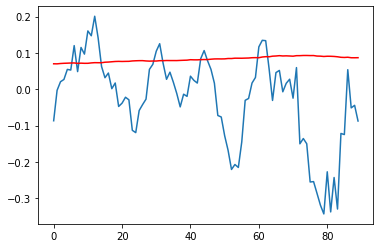

In [77]:
plt.plot(Y_test_list[25])
plt.plot(model.run(X_test_list[25],X_train_list[25],Y_train_list[25]),color="r")

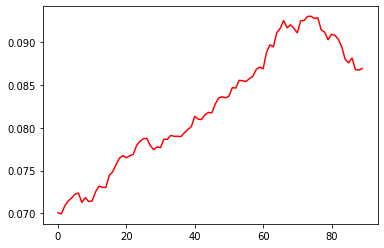

In [69]:

plt.plot(model.run(X_test_list[25],X_train_list[25],Y_train_list[25]),color="r")

In [ ]:
plt.plot()